# Titanic Dataset EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
titanic_train = pd.read_csv("../data/train.csv")
titanic_test = pd.read_csv("../data/test.csv")

In [3]:
titanic_test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [4]:
titanic_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data = titanic_train.copy()
train_data["Age"].fillna(titanic_train["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(titanic_train['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)


In [7]:
#create categorical variables and drop some variables
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

final_train = training
final_train.head()

Survived   Age  SibSp  Parch     Fare  Pclass_1  Pclass_2  Pclass_3  \
0         0  22.0      1      0   7.2500         0         0         1   
1         1  38.0      1      0  71.2833         1         0         0   
2         1  26.0      0      0   7.9250         0         0         1   
3         1  35.0      1      0  53.1000         1         0         0   
4         0  35.0      0      0   8.0500         0         0         1   

   Embarked_C  Embarked_Q  Embarked_S  Sex_male  
0           0           0           1         1  
1           1           0           0         0  
2           0           0           1         0  
3           0           0           1         0  
4           0           0           1         1

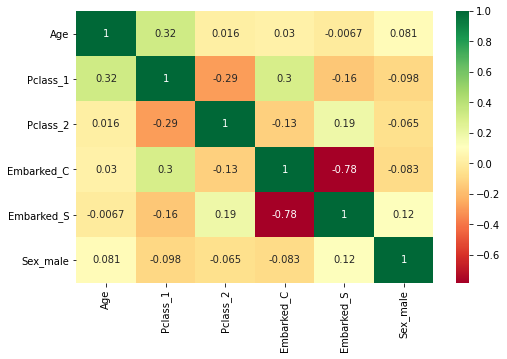

In [8]:
Selected_features = ['Age', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male']
X = final_train[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

Train/Test split results:
LogisticRegression accuracy is 0.782
LogisticRegression log_loss is 0.505
LogisticRegression auc is 0.836


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.


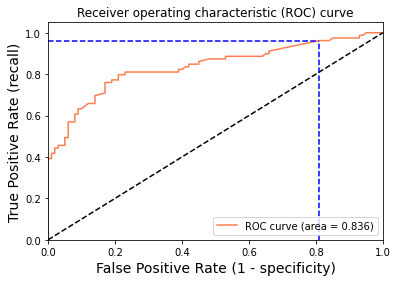

Using a threshold of 0.075 guarantees a sensitivity of 0.962 and a specificity of 0.190, i.e. a false positive rate of 81.00%.


In [9]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features) and y (response)
X = final_train[Selected_features]
y = final_train['Survived']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

Text(0.5, 257.44, 'Predicted label')

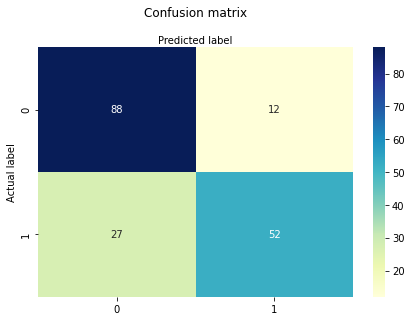

In [10]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [11]:
categories = ["Pclass","Sex","Embarked"]
for cat in categories:
    titanic_train[cat] = titanic_train[cat].astype("category")
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(3), float64(2), int64(4), object(3)
memory usage: 65.7+ KB


In [12]:
titanic_train[titanic_train['Embarked'].isnull()]

PassengerId  Survived Pclass                                       Name  \
61            62         1      1                        Icard, Miss. Amelie   
829          830         1      1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN

In [13]:
# Removing these two passengers as this seems to be a data entry error or these passengers missed the trip
# and didn't board the ship
titanic_train = titanic_train[~titanic_train['Embarked'].isnull()]

In [14]:
# Check for duplicates records
sum(titanic_train.duplicated())

0

In [15]:
# Confirming that duplicate ticket values indicate passengers sharing the same room
titanic_train[titanic_train["Ticket"].duplicated(keep=False)].sort_values(by=['Ticket'])

PassengerId  Survived Pclass  \
257          258         1      1   
759          760         1      1   
504          505         1      1   
558          559         1      1   
585          586         1      1   
..           ...       ...    ...   
436          437         0      3   
736          737         0      3   
86            87         0      3   
540          541         1      1   
745          746         0      1   

                                                  Name     Sex   Age  SibSp  \
257                               Cherry, Miss. Gladys  female  30.0      0   
759  Rothes, the Countess. of (Lucy Noel Martha Dye...  female  33.0      0   
504                              Maioni, Miss. Roberta  female  16.0      0   
558             Taussig, Mrs. Emil (Tillie Mandelbaum)  female  39.0      1   
585                                Taussig, Miss. Ruth  female  18.0      0   
..                                                 ...     ...   ...    ...   
436               Ford, Miss. Doolina Margaret "Daisy"  female  21.0      2   
736            Ford, Mrs. Edward (Margaret Ann Watson)  female  48.0      1   
86                              Ford, Mr. William Neal    male  16.0      1   
540                            Crosby, Miss. Harriet R  female  36.0      0   
745                       Crosby, Capt. Edward Gifford    male  70.0      1   

     Parch      Ticket    Fare Cabin Embarked  
257      0      110152  86.500   B77        S  
759      0      110152  86.500   B77        S  
504      0      110152  86.500   B79        S  
558      1      110413  79.650   E67        S  
585      2      110413  79.650   E68        S  
..     ...         ...     ...   ...      ...  
436      2  W./C. 6608  34.375   NaN        S  
736      3  W./C. 6608  34.375   NaN        S  
86       3  W./C. 6608  34.375   NaN        S  
540      2   WE/P 5735  71.000   B22        S  
745      1   WE/P 5735  71.000   B22        S  

[342 rows x 12 columns]

## Helper Functions

In [55]:
def calc_survival_rate(df):
    survived = sum(df['Survived'] == 1)
    total = len(df)
    return round(survived/total*100,2)

def calc_survival_count(df):
    survived = sum(df['Survived'] == 1)
    return survived

def calc_age_cat(passenger):
    if passenger['Age'] <= 13:
        return "Child"
    elif passenger['Age'] <= 20:
        return "Youth"
    elif passenger['Age'] <= 64:
        return "Adult"
    else:
        return "Senior"
    
def calc_family_role(passenger,df):
    if (passenger["Parch"] ==2 and passenger["SibSp"] >= 0) or (passenger["Parch"] ==1 and passenger["SibSp"] > 1):
        return "Son" if passenger["Sex"]=="male" else "Daughter"
    elif passenger["Parch"] ==0 and passenger["SibSp"] > 1:
        return "Brother" if passenger["Sex"]=="male" else "Sister"(
    elif passenger["Parch"] > 2:
        return "Father" if passenger["Sex"]=="male" else "Mother"
    elif (passenger["Parch"] > 2):
        return "Father" if passenger["Sex"]=="male" else "Mother"
    elif passenger["Parch"] == 0 and passenger["SibSp"] == 1:
        fam_name = passenger["Name"].split(",")[0]
        fam_df = df[(df["Name"].str.startswith(fam_name)) & (df["Ticket"]==passenger["Ticket"])]
        
        if len(fam_df[fam_df["Sex"]=="male"]) == 0 or len(fam_df[fam_df["Sex"]=="female"])==0:
            return "Brother" if passenger["Sex"]=="male" else "Sister"
        else:
            female_fam = fam_df[fam_df["Sex"]=="female"]
            female_firstname= female_fam["Name"].values[0].split(",")[1]
            female_prefix = female_firstname.split(".")[0].strip()
            if female_prefix == "Mrs":
                return "Husband" if passenger["Sex"]=="male" else "Wife"
            else:
                return "Brother" if passenger["Sex"]=="male" else "Sister"
        
    elif passenger["Parch"] <= 2 and passenger["SibSp"] == 1:
        fam_name = passenger["Name"].split(",")[0]
        fam_df = df[(df["Name"].str.startswith(fam_name)) & (df["Ticket"]==passenger["Ticket"])]
        fam_sex_df = fam_df["Sex"]==passenger
            
            if len(fam_df) == 3:
            return "Father" if passenger["Sex"]=="male" else "Mother"
        else:
            eturn "Brother" if passenger["Sex"]=="male" else "Sister"
    elif passenger["Parch"] == 1 and passenger["SibSp"] == 0:
        fam_name = passenger["Name"].split(",")[0]
        fam_df = df[(df["Name"].str.startswith(fam_name)) & (df["Ticket"]==passenger["Ticket"])]

        if passenger["Age"] == max(fam_df["Age"]):
            return "Father" if passenger["Sex"]=="male" else "Mother"
        else:
            return "Son" if passenger["Sex"]=="male" else "Daughter"
    else:
        return "Single"
        
    
def calc_passenger_profile_avg_age(df,passenger):
    passenger_pclass = passenger['Pclass']
    passenger_sex = passenger['Sex']
    passenger_sibsp = passenger['SibSp']
    passenger_parch = passenger['Parch']
    passenger_embarked = passenger['Embarked']
    
    profile = ['Pclass','Sex','SibSp','Parch','Embarked']
    passenger_profile = {'Pclass': passenger_pclass,'Sex': passenger_sex,'SibSp':passenger_sibsp,'Parch':passenger_parch,'Embarked':passenger_embarked}
    
    profile_avg_age = df.groupby(profile,as_index = False)['Age'].mean()
    
    i = len(passenger_profile)
    for n in range(i):
        profile_col = profile[n]
        profile_avg_age = profile_avg_age[profile_avg_age[profile_col]==passenger_profile[profile_col]]
    
    while len(profile_avg_age) == 0 or pd.isna(profile_avg_age["Age"].values[0]) :
        i -= 1
        profile_avg_age = df.groupby(profile[:i],as_index = False)['Age'].mean()
        
        for n in range(i):
            profile_col = profile[n]
            profile_avg_age = profile_avg_age[profile_avg_age[profile_col]==passenger_profile[profile_col]]
            
    return profile_avg_age['Age'].values[0]

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

def plot_survival_bar(df,col=None,ax=None,title=None):
    
    if col:
        col_vals = list(set(df[col].values))

        survived = [len(df[(df["Survived"]==1) & (df[col]==c)]) for c in col_vals]
        not_survived = [len(df[(df["Survived"]==0) & (df[col]==c)]) for c in col_vals]

        survival_rates = [calc_survival_rate(df[df[col]==c]) for c in col_vals]
        
        if not ax:
            fig, ax = plt.subplots(figsize=(15,5))
            
        
        s = ax.bar(col_vals, survived, label='Survived')
        d = ax.bar(col_vals, not_survived, bottom=survived,
               label='Died')

        ax.bar_label(s,survival_rates)
        if title:
            ax.set_title('{} Survival Rate by {}'.format(title,col))
        else:
            ax.set_title('Survival Rate by {}'.format(col))   
        ax.legend()
    else:
        survived = len(df[df["Survived"]==1])
        not_survived = len(df[df["Survived"]==0])

        survival_rate = [calc_survival_rate(df)]
        
        if not ax:
            fig, ax = plt.subplots(figsize=(15,5))

        s = ax.bar(["All Passengers"], survived, label='Survived')
        d = ax.bar(["All Passengers"], not_survived, bottom=survived,
               label='Died')

        ax.bar_label(s,survival_rate)
        ax.set_title('Survival Rate')
        ax.legend()
        
def plot_survival_subplots(df,x,group):
    group_list = list(set(df[group]))
    rows = math.ceil(len(group_list)/ 3)
    cols = min(len(group_list), 3) 
    
    fig, axs = plt.subplots(rows, cols,figsize=(15,5), constrained_layout=True)
  

    for i, ax in enumerate(axs.flat):
        if i == len(group_list): break
        g = group_list[i]
        group_df = df[df[group]==g]
        plot_survival_bar(group_df,x,ax,"{}={}".format(group,g))

    

In [56]:
titanic_train['FamilyRole'] = titanic_train.apply(lambda x: calc_family_role(x,pd.concat([titanic_train,titanic_test])), axis=1)
titanic_train["CabinLetter"] = titanic_train["Cabin"].apply(lambda x: x[0] if not pd.isna(x) else "N/A")
titanic_train['Age_fill'] = titanic_train.apply(lambda x: calc_passenger_profile_avg_age(titanic_train[~titanic_train["Age"].isna()],x) if pd.isna(x['Age']) else x['Age'],axis=1)
titanic_train['AgeCategory'] = titanic_train.apply(lambda x: calc_age_cat(x), axis=1)

In [58]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  889 non-null    int64   
 1   Survived     889 non-null    int64   
 2   Pclass       889 non-null    category
 3   Name         889 non-null    object  
 4   Sex          889 non-null    category
 5   Age          712 non-null    float64 
 6   SibSp        889 non-null    int64   
 7   Parch        889 non-null    int64   
 8   Ticket       889 non-null    object  
 9   Fare         889 non-null    float64 
 10  Cabin        202 non-null    object  
 11  Embarked     889 non-null    category
 12  FamilyRole   889 non-null    object  
 13  CabinLetter  889 non-null    object  
 14  Age_fill     889 non-null    float64 
 15  AgeCategory  889 non-null    object  
dtypes: category(3), float64(3), int64(4), object(6)
memory usage: 100.1+ KB


In [19]:
categories = ["AgeCategory","FamilyRole","CabinLetter"]
for cat in categories:
    titanic_train[cat] = titanic_train[cat].astype("category") 

## Overall Survival Rate

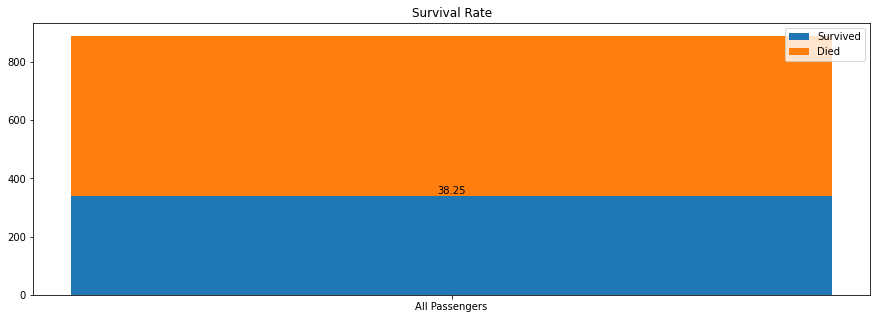

In [20]:
plot_survival_bar(titanic_train)

## Survival Rate by Sex

In [21]:
titanic_train_male = titanic_train[titanic_train['Sex']=='male']
titanic_train_female = titanic_train[titanic_train['Sex']=='female']

In [22]:
male_survival_rate = calc_survival_rate(titanic_train_male)
male_survival_count = calc_survival_count(titanic_train_male)

female_survival_rate = calc_survival_rate(titanic_train_female)
female_survival_count = calc_survival_count(titanic_train_female)

print("Male Survival Rate: {}, Male Survival Count: {}".format(male_survival_rate,male_survival_count))
print("Female Survival Rate: {}, Female Survival Count: {}".format(female_survival_rate,female_survival_count))

Male Survival Rate: 18.89, Male Survival Count: 109
Female Survival Rate: 74.04, Female Survival Count: 231


In [23]:
print(len(titanic_train_male))
print(len(titanic_train_female))

577
312


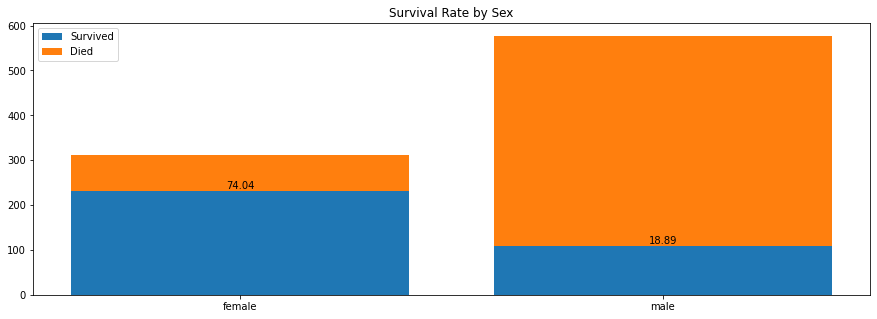

In [24]:
plot_survival_bar(titanic_train,"Sex")

## Survival Rate by AgeCategory

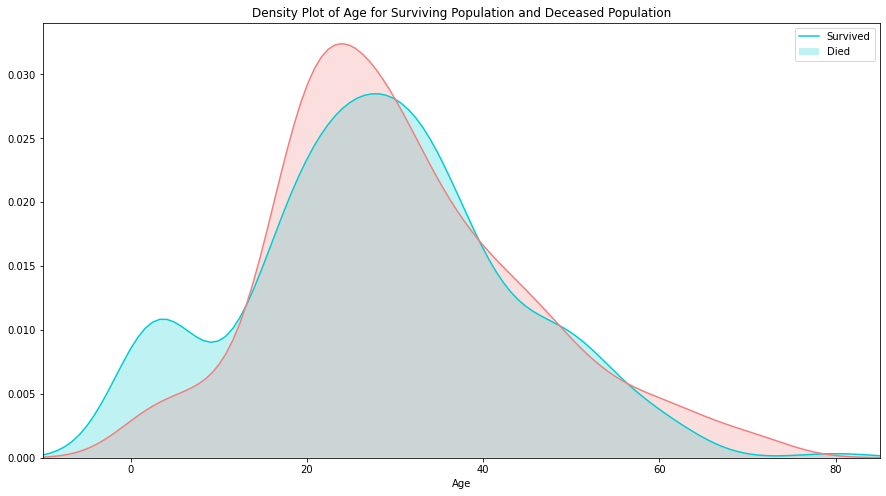

In [25]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(titanic_train["Age"][titanic_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(titanic_train["Age"][titanic_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

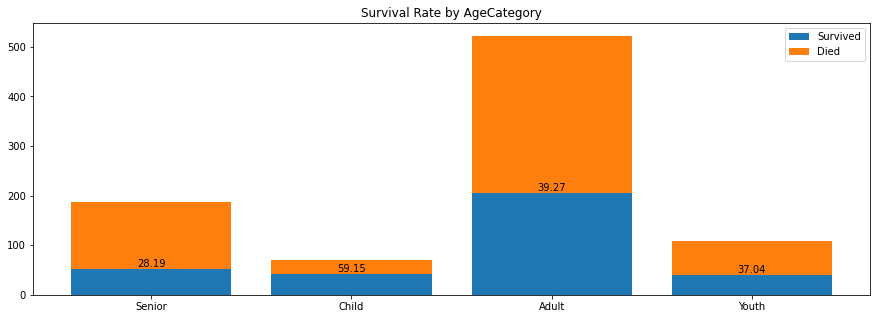

In [26]:
plot_survival_bar(titanic_train,"AgeCategory")

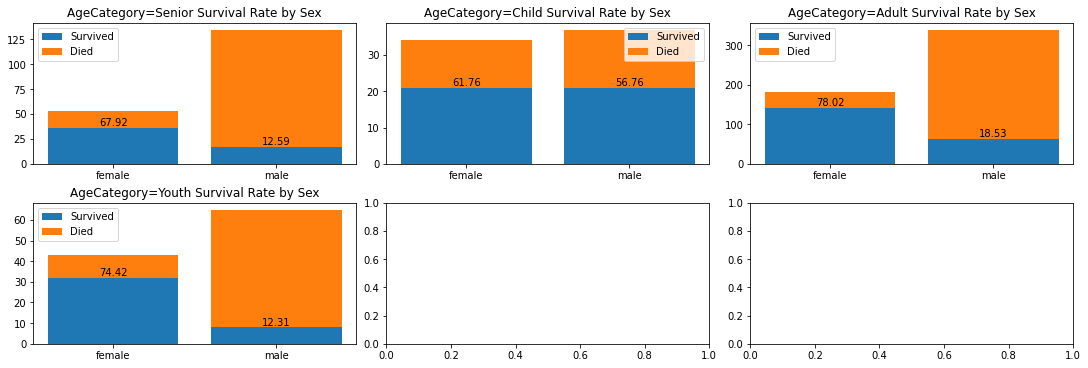

In [27]:
plot_survival_subplots(titanic_train,"Sex","AgeCategory")

## Survival Rate by Pclass

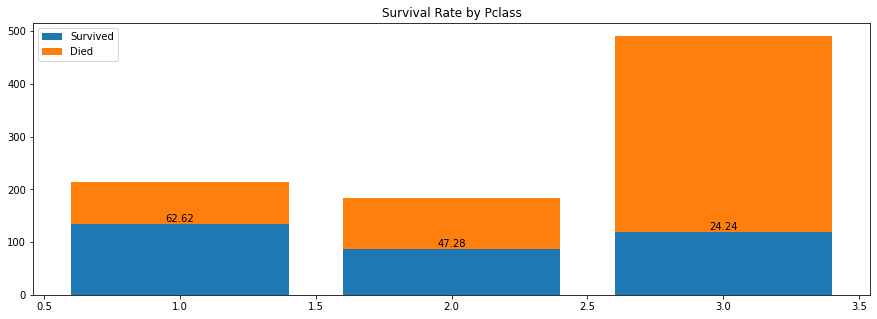

In [28]:
plot_survival_bar(titanic_train,"Pclass")

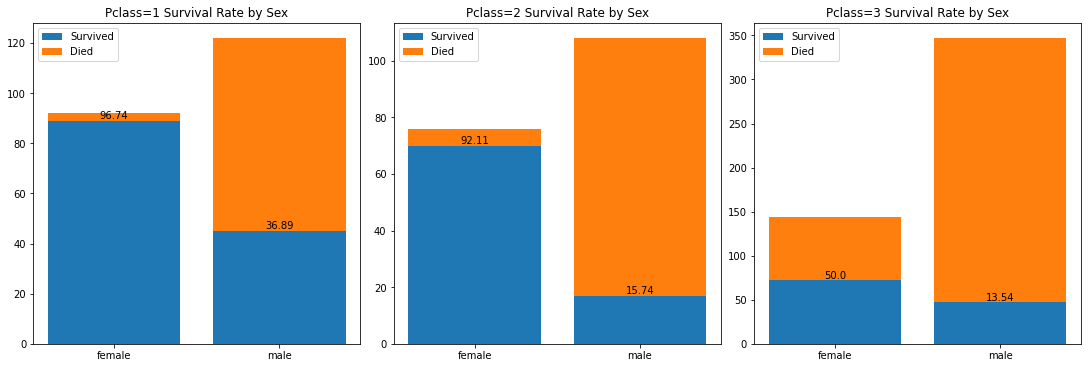

In [29]:
plot_survival_subplots(titanic_train,"Sex","Pclass") 

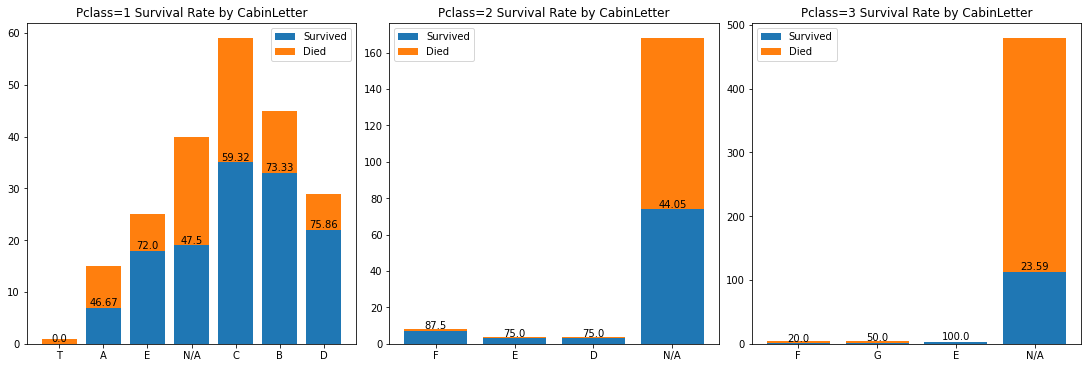

In [30]:
plot_survival_subplots(titanic_train,"CabinLetter","Pclass")

## Survival Rate by Cabin

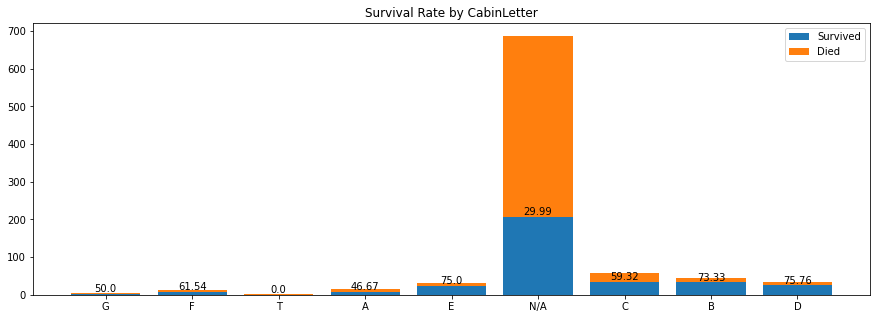

In [31]:
plot_survival_bar(titanic_train,"CabinLetter")

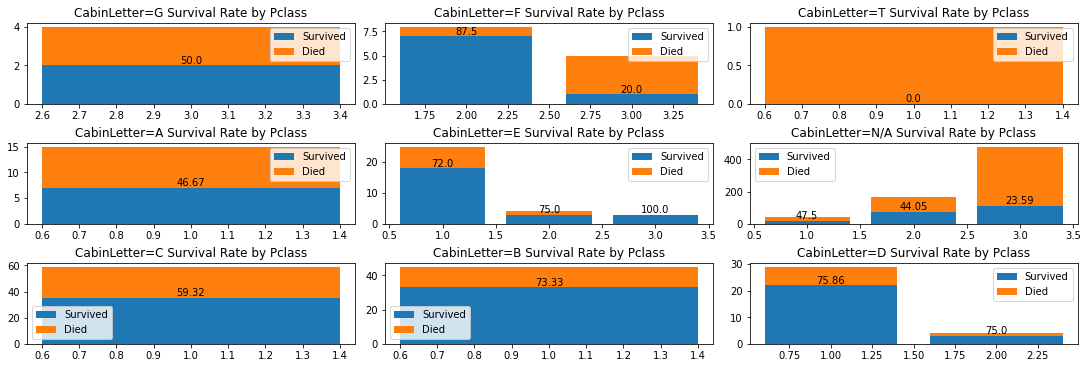

In [32]:
plot_survival_subplots(titanic_train,"Pclass","CabinLetter")

In [33]:
titanic_train[titanic_train["CabinLetter"]=="T"]

PassengerId  Survived Pclass                          Name   Sex   Age  \
339          340         0      1  Blackwell, Mr. Stephen Weart  male  45.0   

     SibSp  Parch  Ticket  Fare Cabin Embarked FamilyRole CabinLetter  \
339      0      0  113784  35.5     T        S     Single           T   

     Age_fill AgeCategory  
339      45.0       Adult

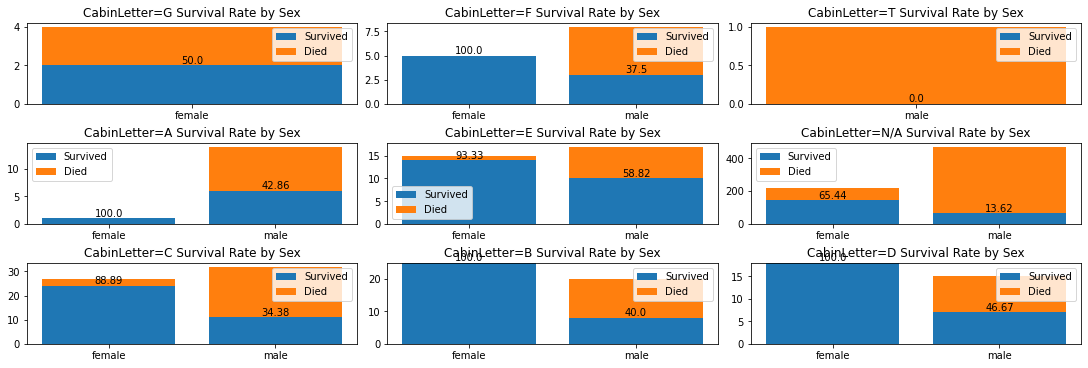

In [34]:
plot_survival_subplots(titanic_train,"Sex","CabinLetter")

## Survival Rate by FamilyRole

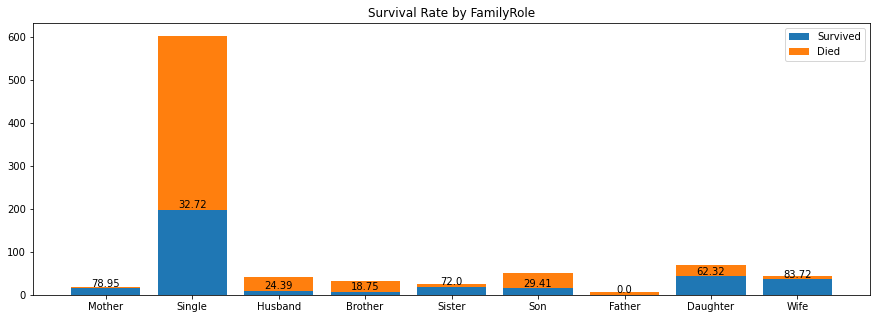

In [62]:
plot_survival_bar(titanic_train,"FamilyRole")

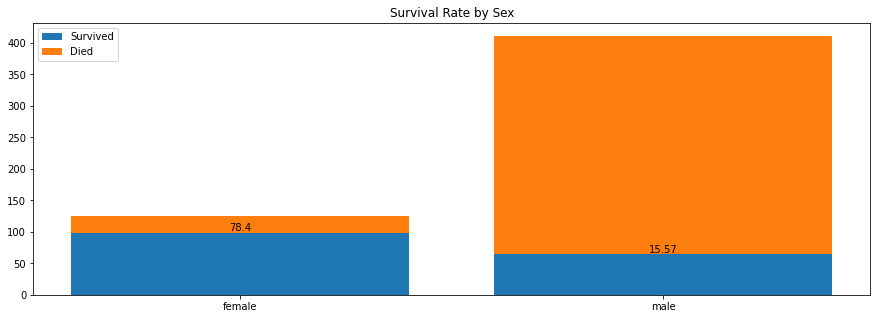

In [36]:
plot_survival_bar(titanic_train[titanic_train["FamilyRole"]=="Single"],"Sex")

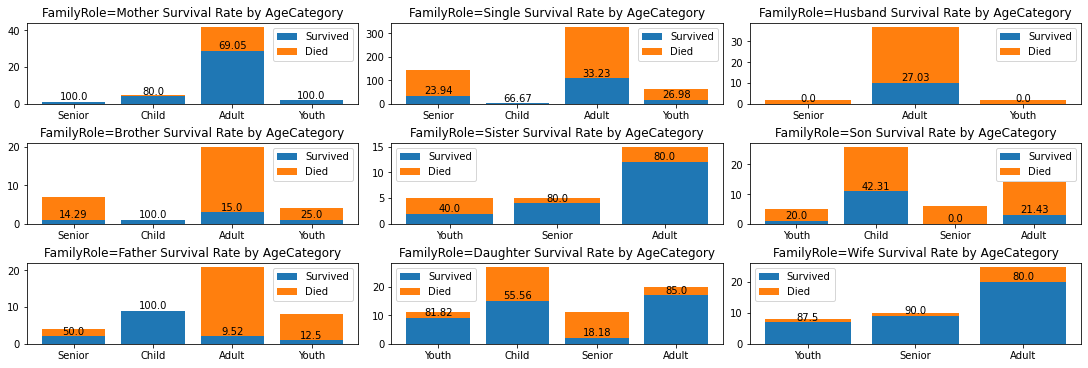

In [37]:
plot_survival_subplots(titanic_train,"AgeCategory","FamilyRole")

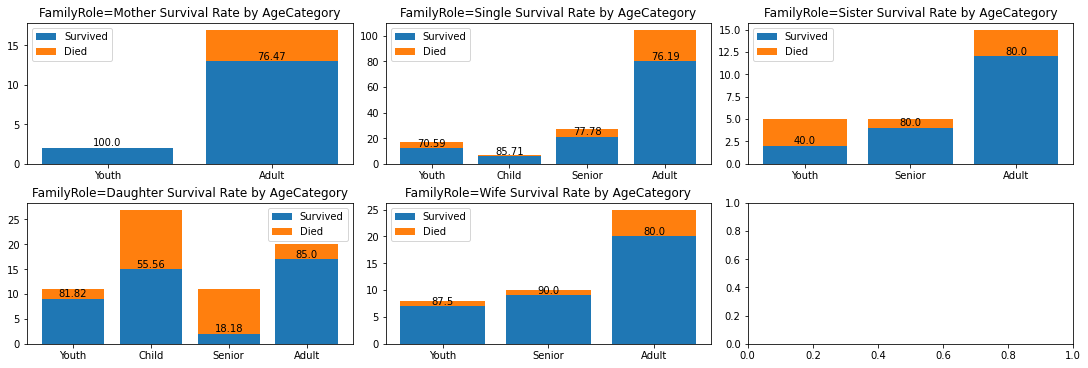

In [60]:
plot_survival_subplots(titanic_train[titanic_train["Sex"]=="female"],"AgeCategory","FamilyRole")

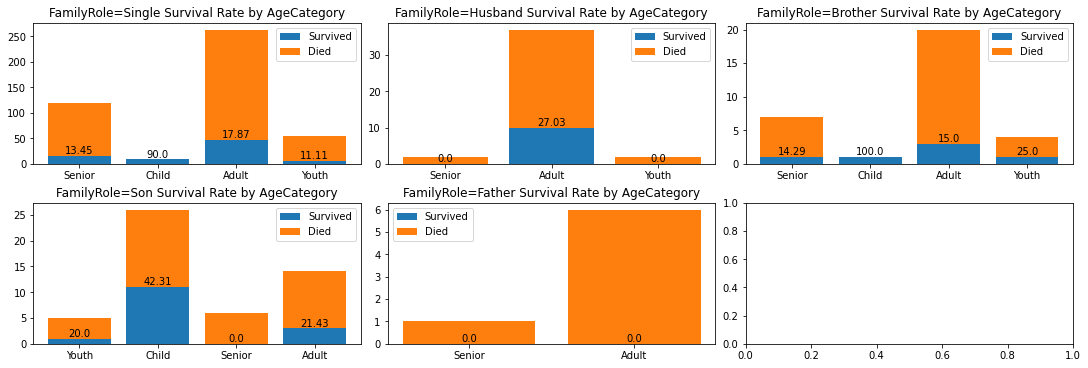

In [61]:
plot_survival_subplots(titanic_train[titanic_train["Sex"]=="male"],"AgeCategory","FamilyRole")

In [64]:
titanic_train[titanic_train["Parch"]==2]

PassengerId  Survived Pclass  \
8              9         1      3   
27            28         0      1   
43            44         1      2   
58            59         1      2   
59            60         0      3   
..           ...       ...    ...   
827          828         1      2   
846          847         0      3   
850          851         0      3   
863          864         0      3   
888          889         0      3   

                                                  Name     Sex   Age  SibSp  \
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
27                      Fortune, Mr. Charles Alexander    male  19.0      3   
43            Laroche, Miss. Simonne Marie Anne Andree  female   3.0      1   
58                        West, Miss. Constance Mirium  female   5.0      1   
59                  Goodwin, Master. William Frederick    male  11.0      5   
..                                                 ...     ...   ...    ...   
827                              Mallet, Master. Andre    male   1.0      0   
846                           Sage, Mr. Douglas Bullen    male   NaN      8   
850            Andersson, Master. Sigvard Harald Elias    male   4.0      4   
863                  Sage, Miss. Dorothy Edith "Dolly"  female   NaN      8   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   

     Parch           Ticket      Fare        Cabin Embarked FamilyRole  \
8        2           347742   11.1333          NaN        S   Daughter   
27       2            19950  263.0000  C23 C25 C27        S        Son   
43       2    SC/Paris 2123   41.5792          NaN        C   Daughter   
58       2       C.A. 34651   27.7500          NaN        S   Daughter   
59       2          CA 2144   46.9000          NaN        S        Son   
..     ...              ...       ...          ...      ...        ...   
827      2  S.C./PARIS 2079   37.0042          NaN        C        Son   
846      2         CA. 2343   69.5500          NaN        S        Son   
850      2           347082   31.2750          NaN        S        Son   
863      2         CA. 2343   69.5500          NaN        S   Daughter   
888      2       W./C. 6607   23.4500          NaN        S   Daughter   

    CabinLetter   Age_fill AgeCategory  
8           N/A  27.000000       Adult  
27            C  19.000000       Youth  
43          N/A   3.000000       Child  
58          N/A   5.000000       Child  
59          N/A  11.000000       Child  
..          ...        ...         ...  
827         N/A   1.000000       Child  
846         N/A  26.507589      Senior  
850         N/A   4.000000       Child  
863         N/A  21.750000      Senior  
888         N/A  27.232143      Senior  

[80 rows x 16 columns]

## Model Training on Additional Data

In [38]:
titanic_train.head()

PassengerId  Survived Pclass  \
0            1         0      3   
1            2         1      1   
2            3         1      3   
3            4         1      1   
4            5         0      3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked FamilyRole CabinLetter  \
0      0         A/5 21171   7.2500   NaN        S    Brother         N/A   
1      0          PC 17599  71.2833   C85        C       Wife           C   
2      0  STON/O2. 3101282   7.9250   NaN        S     Single         N/A   
3      0            113803  53.1000  C123        S       Wife           C   
4      0            373450   8.0500   NaN        S     Single         N/A   

   Age_fill AgeCategory  
0      22.0       Adult  
1      38.0       Adult  
2      26.0       Adult  
3      35.0       Adult  
4      35.0       Adult

In [49]:
#create categorical variables and drop some variables
train_data_add = titanic_train.copy()
training_add = pd.get_dummies(train_data_add, columns=["Pclass","Embarked","Sex","CabinLetter","FamilyRole","AgeCategory"])
training_add.drop('Sex_female', axis=1, inplace=True)
training_add.drop('PassengerId', axis=1, inplace=True)
training_add.drop('Name', axis=1, inplace=True)
training_add.drop('Ticket', axis=1, inplace=True)
training_add.drop('Cabin', axis=1, inplace=True)
training_add.drop('SibSp', axis=1, inplace=True)
training_add.drop('Parch', axis=1, inplace=True)
training_add.drop('Age', axis=1, inplace=True)
training_add.drop('Age_fill', axis=1, inplace=True)
training_add.drop('Fare', axis=1, inplace=True)

training_add.head()

Survived  Pclass_1  Pclass_2  Pclass_3  Embarked_C  Embarked_Q  Embarked_S  \
0         0         0         0         1           0           0           1   
1         1         1         0         0           1           0           0   
2         1         0         0         1           0           0           1   
3         1         1         0         0           0           0           1   
4         0         0         0         1           0           0           1   

   Sex_male  CabinLetter_A  CabinLetter_B  ...  FamilyRole_Husband  \
0         1              0              0  ...                   0   
1         0              0              0  ...                   0   
2         0              0              0  ...                   0   
3         0              0              0  ...                   0   
4         1              0              0  ...                   0   

   FamilyRole_Mother  FamilyRole_Single  FamilyRole_Sister  FamilyRole_Son  \
0                  0                  0                  0               0   
1                  0                  0                  0               0   
2                  0                  1                  0               0   
3                  0                  0                  0               0   
4                  0                  1                  0               0   

   FamilyRole_Wife  AgeCategory_Adult  AgeCategory_Child  AgeCategory_Senior  \
0                0                  1                  0                   0   
1                1                  1                  0                   0   
2                0                  1                  0                   0   
3                1                  1                  0                   0   
4                0                  1                  0                   0   

   AgeCategory_Youth  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 30 columns]

Train/Test split results:
LogisticRegression accuracy is 0.782
LogisticRegression log_loss is 0.505
LogisticRegression auc is 0.836


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.


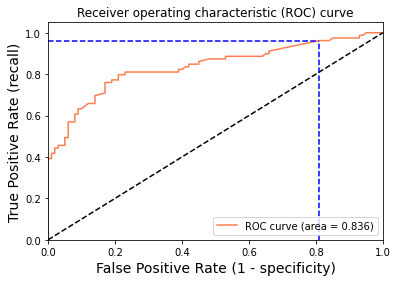

Using a threshold of 0.075 guarantees a sensitivity of 0.962 and a specificity of 0.190, i.e. a false positive rate of 81.00%.


In [45]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features) and y (response)
X = final_train[Selected_features]
y = final_train['Survived']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

Train/Test split results:
LogisticRegression accuracy is 0.803
LogisticRegression log_loss is 0.441
LogisticRegression auc is 0.860


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.


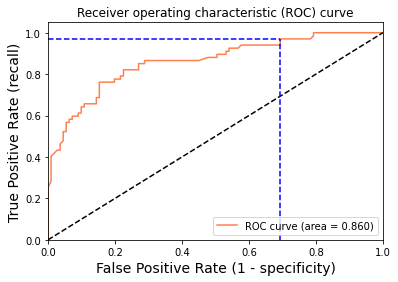

Using a threshold of 0.088 guarantees a sensitivity of 0.970 and a specificity of 0.306, i.e. a false positive rate of 69.37%.


In [43]:
# create X (features) and y (response)
X = training_add.loc[:, training_add.columns != 'Survived']
y = training_add['Survived']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

Text(0.5, 257.44, 'Predicted label')

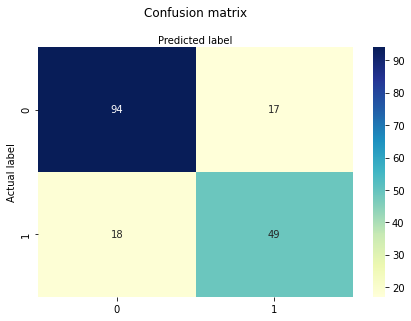

In [44]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 257.44, 'Predicted label')

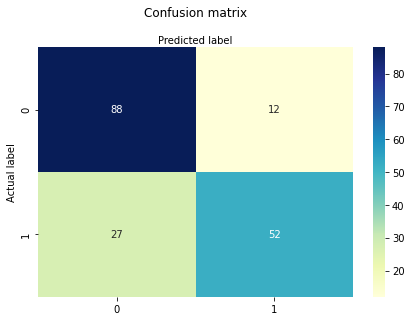

In [46]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [47]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7821229050279329
Precision: 0.8125
Recall: 0.6582278481012658


In [48]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7821229050279329
Precision: 0.8125
Recall: 0.6582278481012658


1) apply 1-2 different models
2) Look into PCA to determine optimal features 
3) Research model performance indicators (ROC curve, etc)